# A - Intro Baumdaten Berlin

Environment für dieses Notebook: `ads-ml-full` (*requirements-py3.11-ads-ml-full.txt*).

<span style="color:red">Falls die Daten bereits als .parquet vorliegen, kann bei [Start mit gecachten Daten](#start-mit-gecachten-daten) losgelegt werden.</span>

## Referenzen zu den Daten

[Berlin Open Data - Anlagenbäume](https://daten.berlin.de/datensaetze/baumbestand-berlin-anlagenb%C3%A4ume-wfs)

[Inhaltliche Datenbeschreibung](https://fbinter.stadt-berlin.de/fb_daten/beschreibung/sachdaten/baumbestand.html)

[Beschreibung der Datenattribute](https://fbinter.stadt-berlin.de/fb_daten/beschreibung/datenformatbeschreibung/Datenformatbeschreibung_Baeume.pdf)

In [1]:
from pathlib import Path

import yaml

with Path("../configs/config_baumbestand_an.yaml").open() as f:
    config = yaml.safe_load(f.read())

## Download vom WFS Service
Auf Windows kann es zu Problemen wegen des Pfades in der Konfigurationsdatei kommen. Falls das Problem auftritt, kann im Ordner in dem auch das Notebook während der Ausführung liegt ein leerer Ordner erstellt werden, welcher dann statt `tmpdir: /tmp` in der Konfiguration angegeben wird.

In [2]:
from wfs_downloader.download import download_files

download_files(config)

fetching /tmp/strassenbaeume_369097.85_5799298.14.xml
fetching /tmp/strassenbaeume_369097.85_5809298.14.xml
fetching /tmp/strassenbaeume_369097.85_5819298.14.xml
fetching /tmp/strassenbaeume_369097.85_5829298.14.xml
fetching /tmp/strassenbaeume_379097.85_5799298.14.xml
fetching /tmp/strassenbaeume_379097.85_5809298.14.xml
fetching /tmp/strassenbaeume_379097.85_5819298.14.xml
fetching /tmp/strassenbaeume_379097.85_5829298.14.xml
fetching /tmp/strassenbaeume_389097.85_5799298.14.xml
fetching /tmp/strassenbaeume_389097.85_5809298.14.xml
fetching /tmp/strassenbaeume_389097.85_5819298.14.xml
fetching /tmp/strassenbaeume_389097.85_5829298.14.xml
fetching /tmp/strassenbaeume_399097.85_5799298.14.xml
fetching /tmp/strassenbaeume_399097.85_5809298.14.xml
fetching /tmp/strassenbaeume_399097.85_5819298.14.xml
fetching /tmp/strassenbaeume_399097.85_5829298.14.xml
fetching /tmp/strassenbaeume_409097.85_5799298.14.xml
fetching /tmp/strassenbaeume_409097.85_5809298.14.xml
fetching /tmp/strassenbaeume

In [3]:
from wfs_downloader.download import combine_files

combine_files(config)

merging /tmp/strassenbaeume_389097.85_5799298.14.xml
merging /tmp/strassenbaeume_399097.85_5829298.14.xml
merging /tmp/strassenbaeume_409097.85_5799298.14.xml
merging /tmp/strassenbaeume_369097.85_5819298.14.xml
merging /tmp/strassenbaeume_379097.85_5809298.14.xml
merging /tmp/strassenbaeume_399097.85_5809298.14.xml
merging /tmp/strassenbaeume_379097.85_5829298.14.xml
merging /tmp/strassenbaeume_389097.85_5819298.14.xml
merging /tmp/strassenbaeume_409097.85_5819298.14.xml
merging /tmp/strassenbaeume_379097.85_5819298.14.xml
merging /tmp/strassenbaeume_409097.85_5829298.14.xml
merging /tmp/strassenbaeume_399097.85_5799298.14.xml
merging /tmp/strassenbaeume_389097.85_5829298.14.xml
merging /tmp/strassenbaeume_369097.85_5809298.14.xml
merging /tmp/strassenbaeume_409097.85_5809298.14.xml
merging /tmp/strassenbaeume_389097.85_5809298.14.xml
merging /tmp/strassenbaeume_399097.85_5819298.14.xml
merging /tmp/strassenbaeume_379097.85_5799298.14.xml
merging /tmp/strassenbaeume_369097.85_5829298.

In [4]:
outfile = Path("../data") / config["outputfile"]
Path(config["outputfile"]).rename(outfile)

PosixPath('../data/strassenbaeume.xml')

In [29]:
import geopandas as gpd

data = gpd.read_file(outfile)

In [30]:
data[data.notna().all(axis=1)].head()

,baumid,standortnr,kennzeich,namenr,art_dtsch,art_bot,gattung_deutsch,gattung,stammumfg,bezirk,eigentuemer,pflanzjahr,standalter,kronedurch,baumhoehe,geometry
32,00008100:0016cadf,010026,100980,Landschaftspark Glienicke N - Teil 1/2,Hainbuche,Carpinus betulus,HAINBUCHE,CARPINUS,300.0,Steglitz-Zehlendorf,Land Berlin,1920.0,103.0,16.0,12.0,POINT (370588.403 5808885.010)
35,00008100:0016cae4,010023,100980,Landschaftspark Glienicke N - Teil 1/2,"Sommer-Eiche, Stiel-Eiche",Quercus robur,EICHE,QUERCUS,293.0,Steglitz-Zehlendorf,Land Berlin,1850.0,173.0,16.0,23.0,POINT (370592.105 5808850.381)
38,00008100:0016cae7,010021,100980,Landschaftspark Glienicke N - Teil 1/2,"Sommer-Eiche, Stiel-Eiche",Quercus robur,EICHE,QUERCUS,273.0,Steglitz-Zehlendorf,Land Berlin,1850.0,173.0,14.0,27.0,POINT (370587.379 5808848.481)
43,00008100:0016caed,010011,100980,Landschaftspark Glienicke N - Teil 1/2,Rot-Buche,Fagus sylvatica,BUCHE,FAGUS,280.0,Steglitz-Zehlendorf,Land Berlin,1850.0,173.0,17.0,32.0,POINT (370558.324 5808848.203)
44,00008100:0016caee,010010,100980,Landschaftspark Glienicke N - Teil 1/2,Rot-Buche,Fagus sylvatica,BUCHE,FAGUS,255.0,Steglitz-Zehlendorf,Land Berlin,1850.0,173.0,11.0,24.0,POINT (370545.287 5808839.411)


In [31]:
from repml.transformation.geo_conversion import convert_etrs89_to_latlon

data["lon"], data["lat"] = convert_etrs89_to_latlon(
    easting=data["geometry"].x, northing=data["geometry"].y, zone_number=33, zone_letter="U"
)

## Lokales Caching

In [32]:
local_path = "../data/baumkataster_berlin_2023.parquet"
data.to_parquet(local_path)

## Start mit gecachten Daten

In [13]:
import pandas as pd

local_path = "../data/baumkataster_berlin_2023.parquet"
data = pd.read_parquet(local_path)

## Profiling

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417116 entries, 0 to 417115
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   baumid           417116 non-null  object 
 1   standortnr       417115 non-null  object 
 2   kennzeich        417116 non-null  object 
 3   namenr           417116 non-null  object 
 4   art_dtsch        416241 non-null  object 
 5   art_bot          416242 non-null  object 
 6   gattung_deutsch  399054 non-null  object 
 7   gattung          416241 non-null  object 
 8   stammumfg        413455 non-null  float64
 9   bezirk           417116 non-null  object 
 10  eigentuemer      417116 non-null  object 
 11  pflanzjahr       275452 non-null  float64
 12  standalter       275461 non-null  float64
 13  kronedurch       242360 non-null  float64
 14  baumhoehe        344405 non-null  float64
 15  lon              417116 non-null  float64
 16  lat              417116 non-null  floa

In [15]:
data.nunique()

baumid             416458
standortnr          89542
kennzeich            4262
namenr               4688
art_dtsch             724
art_bot               763
gattung_deutsch        90
gattung                98
stammumfg             956
bezirk                 12
eigentuemer             1
pflanzjahr            283
standalter            282
kronedurch            247
baumhoehe             219
lon                416390
lat                416390
dtype: int64

## Fehlende Daten

In [16]:
data.isna().sum()

baumid                  0
standortnr              1
kennzeich               0
namenr                  0
art_dtsch             875
art_bot               874
gattung_deutsch     18062
gattung               875
stammumfg            3661
bezirk                  0
eigentuemer             0
pflanzjahr         141664
standalter         141655
kronedurch         174756
baumhoehe           72711
lon                     0
lat                     0
dtype: int64

In [17]:
data.isna().sum() / data.isna().count()

baumid             0.000000
standortnr         0.000002
kennzeich          0.000000
namenr             0.000000
art_dtsch          0.002098
art_bot            0.002095
gattung_deutsch    0.043302
gattung            0.002098
stammumfg          0.008777
bezirk             0.000000
eigentuemer        0.000000
pflanzjahr         0.339627
standalter         0.339606
kronedurch         0.418963
baumhoehe          0.174318
lon                0.000000
lat                0.000000
dtype: float64

Es fehlen einige Altersdaten und Größeninfos!

In [18]:
pj_unknown_mask = data["pflanzjahr"].isna()

pj_known = data.loc[~pj_unknown_mask, "art_dtsch"].value_counts()
pj_unknown = data.loc[pj_unknown_mask, "art_dtsch"].value_counts()
pj_known = pd.DataFrame(pj_known)
pj_unknown = pd.DataFrame(pj_unknown)

In [19]:
distribution = pj_known.merge(
    pj_unknown, left_index=True, right_index=True, suffixes=("_pj_known", "_pj_unknown")
)
distribution = distribution.rename(
    columns={"count_pj_known": "art_dtsch_pj_known", "count_pj_unknown": "art_dtsch_pj_unknown"}
)

In [20]:
distribution

,art_dtsch_pj_known,art_dtsch_pj_unknown
art_dtsch,,
Spitz-Ahorn,33690,13987
"Sommer-Eiche, Stiel-Eiche",22635,12840
Robinie,15852,6885
Sand-Birke,12692,4731
Winter-Linde,12664,4626
...,...,...
Amerikanische Weiss-Eiche,1,39
Purpur-Fichte,1,1
Trauerzypresse,1,10


In [21]:
distribution["total"] = distribution["art_dtsch_pj_known"] + distribution["art_dtsch_pj_unknown"]
distribution = distribution.sort_values(by="total", ascending=False)

In [22]:
distribution[:15]

,art_dtsch_pj_known,art_dtsch_pj_unknown,total
art_dtsch,,,
Spitz-Ahorn,33690,13987,47677
"Sommer-Eiche, Stiel-Eiche",22635,12840,35475
Robinie,15852,6885,22737
Hainbuche,12209,8012,20221
Sand-Birke,12692,4731,17423
"Berg-Ahorn, Weiss-Ahorn",12599,4795,17394
Feld-Ahorn,11772,5544,17316
Winter-Linde,12664,4626,17290
Rot-Buche,9593,2003,11596


<Axes: xlabel='art_dtsch'>

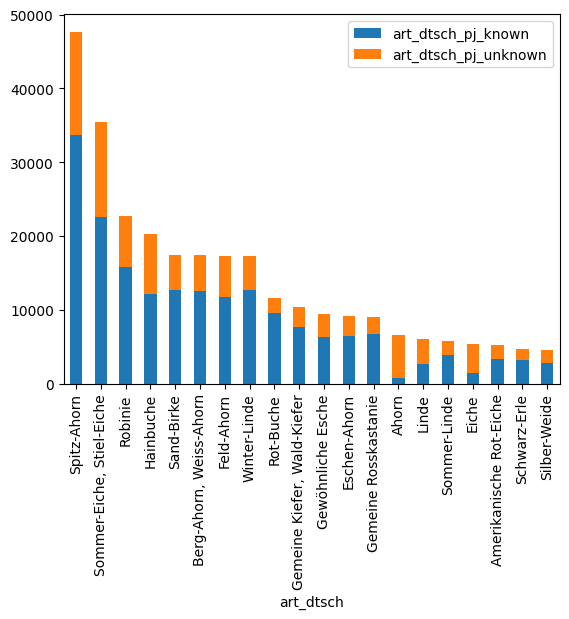

In [23]:
distribution[["art_dtsch_pj_known", "art_dtsch_pj_unknown"]][:20].plot.bar(stacked=True)

## Korrelationen

In [24]:
corr = data.select_dtypes(exclude=["object"]).corr().round(2)
corr

,stammumfg,pflanzjahr,standalter,kronedurch,baumhoehe,lon,lat
stammumfg,1.00,0.00,0.14,0.05,0.02,-0.03,-0.01
pflanzjahr,0.00,1.00,-1.00,-0.07,-0.15,-0.00,-0.00
standalter,0.14,-1.00,1.00,0.07,0.15,-0.17,-0.08
kronedurch,0.05,-0.07,0.07,1.00,0.01,-0.01,0.01
baumhoehe,0.02,-0.15,0.15,0.01,1.00,-0.01,0.01
lon,-0.03,-0.00,-0.17,-0.01,-0.01,1.00,0.06
lat,-0.01,-0.00,-0.08,0.01,0.01,0.06,1.00


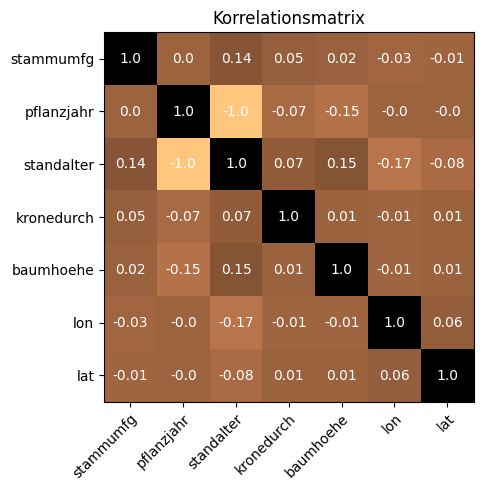

In [25]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.imshow(corr, cmap=plt.get_cmap("copper_r"))
ax.set_xticks(np.arange(len(corr)), labels=corr.columns.to_list())
ax.set_yticks(np.arange(len(corr)), labels=corr.columns.to_list())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(corr)):
    for j in range(len(corr)):
        text = ax.text(j, i, corr.iloc[i, j], ha="center", va="center", color="w")

ax.set_title("Korrelationsmatrix")
plt.show()

## Pflanzjahr Details

<Axes: >

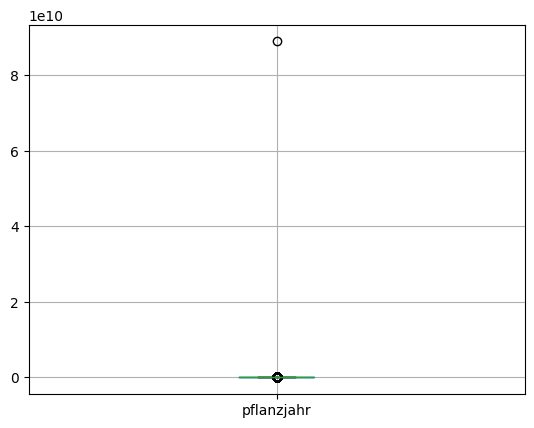

In [26]:
data[["pflanzjahr"]].boxplot()

<Axes: >

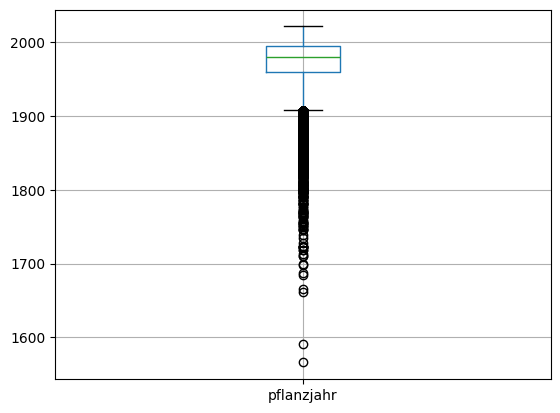

In [27]:
data[(data["pflanzjahr"] < 2022) & (data["pflanzjahr"] > 1500)][["pflanzjahr"]].boxplot()

## Kartendarstellung

In [ ]:
import plotly.express as px

data["age_known"] = data.pflanzjahr.notna()

fig = px.scatter_mapbox(
    data,
    lat="lat",
    lon="lon",
    color="age_known",
    width=1200,
    height=600,
    color_discrete_sequence=["red", "green"],
    zoom=9,
    opacity=0.3,
    mapbox_style="open-street-map",
)

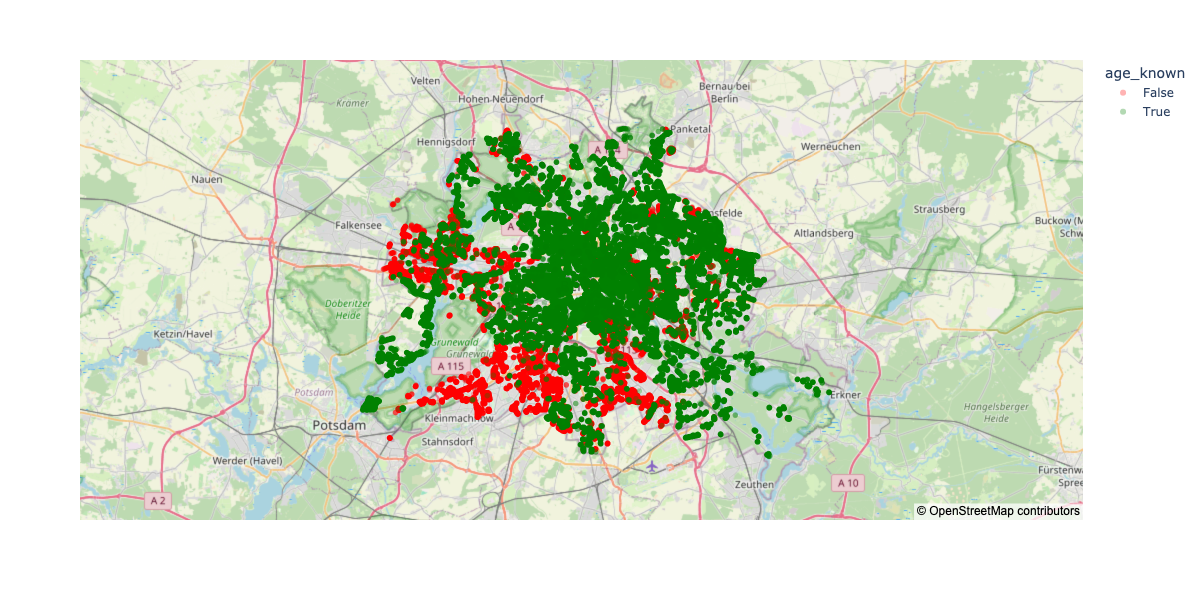

In [ ]:
# fig.show()

# digitales Skript (statisch)
from IPython.display import Image

img_bytes = fig.to_image(format="png")
Image(img_bytes)